In [431]:
import scipy.fftpack
import numpy as np
import random

In [432]:
FD = 22000
N = 2000

In [433]:
def sig1(x):
    return 2*np.sin(2*np.pi*100*x/FD)
def sig2(x):
    return 3*np.sin(2*np.pi*593*x/FD)
def sig3(x):
    return 4*np.sin(2*np.pi*1111*x/FD)
def noise():
    return random.uniform(-2,2)
def sig(x):
    return sig1(x)+sig2(x)+sig3(x)+noise()

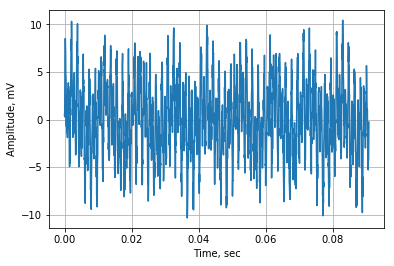

In [484]:
#noised signal
import matplotlib.pyplot as plt
noised_signal=[sig(x) for x in range(N)]
plt.plot(np.arange(N)/float(FD), noised_signal)
plt.grid(True)
plt.xlabel('Time, sec')
plt.ylabel('Amplitude, mV')
plt.show()

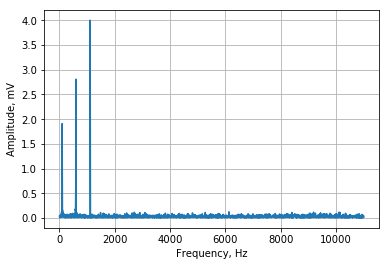

In [485]:
spectrum = scipy.fftpack.rfft(noised_signal)
freq = scipy.fftpack.rfftfreq(N, 1/FD)
amp = 2*np.abs(spectrum)/N
plt.plot(freq, amp)
plt.grid(True)
plt.xlabel('Frequency, Hz')
plt.ylabel('Amplitude, mV')
plt.show()

In [479]:
main_freq=np.empty(N)
for i in range (N):
    if amp[i]>1.5: main_freq[i] = spectrum[i]
    else:  main_freq[i] = 0

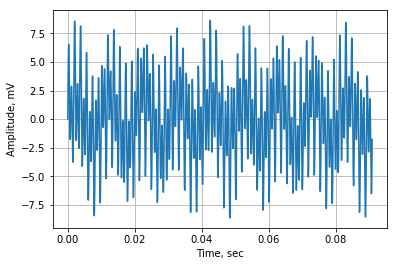

In [486]:
#cleared signal
cleared_signal=scipy.fftpack.irfft(main_freq)
plt.plot(np.arange(N)/float(FD), cleared_signal)
plt.grid(True)
plt.xlabel('Time, sec')
plt.ylabel('Amplitude, mV')
plt.show()

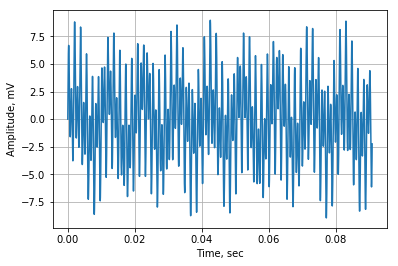

In [487]:
#real signal
def rsig(x):
    return sig1(x)+sig2(x)+sig3(x)
real_signal=[rsig(x) for x in range(N)]
plt.plot(np.arange(N)/float(FD), real_signal)
plt.grid(True)
plt.xlabel('Time, sec')
plt.ylabel('Amplitude, mV')
plt.show()